In [57]:
import pandas as pd
import datetime
import os
import numpy as np

In [58]:
all_df = pd.DataFrame()
for filename in os.listdir("./record_excels_may/"):
    print(filename)
    df = pd.read_excel("./record_excels_may/{}".format(filename))
    print(len(df))
    all_df = pd.concat([all_df, df])

2018-11-27.xlsx
5116
2018-10-30.xlsx
3515
2018-10-26.xlsx
4865
2018-10-06.xlsx
3612
2018-10-10.xlsx
3285
2018-11-11.xlsx
6314
2018-12-01.xlsx
8465
2018-09-30.xlsx
1959
2018-11-10.xlsx
4905
2018-10-07.xlsx
3001
2018-10-27.xlsx
2528
2018-10-16.xlsx
4594
2018-11-17.xlsx
6935
2018-12-07.xlsx
5502
2018-11-01.xlsx
3460
2018-10-20.xlsx
4304
2018-10-21.xlsx
4201
2018-11-20.xlsx
4887
2018-10-17.xlsx
2842
2018-11-03.xlsx
4145
2018-12-05.xlsx
3601
2018-11-15.xlsx
4202
2018-10-14.xlsx
3600
2018-10-02.xlsx
4006
2018-12-09.xlsx
5401
2018-11-22.xlsx
6606
2018-10-19.xlsx
2405
2018-12-08.xlsx
4832
2018-11-18.xlsx
9008
2018-10-23.xlsx
4165
2018-10-03.xlsx
1324
2018-09-19.xlsx
1608
2018-09-23.xlsx
2401
2018-11-14.xlsx
2728
2018-12-04.xlsx
6144
2018-11-02.xlsx
1801
2018-11-09.xlsx
4150
2018-10-24.xlsx
2782
2018-09-28.xlsx
1784
2018-11-25.xlsx
8203
2018-10-28.xlsx
4888
2018-11-13.xlsx
4295
2018-10-12.xlsx
3822
2018-11-29.xlsx
4034
2018-10-05.xlsx
1349
2018-10-13.xlsx
2899
2018-09-25.xlsx
4043
2018-11-12.xl

In [59]:
len(all_df)

219043

In [79]:
weeks = []
dates = []
days = []
for localtime in all_df["localtime"]:
    day_diff = (localtime - datetime.datetime(2018,9,1)).days
    dates.append(localtime.strftime("%Y-%m-%d"))
    days.append(day_diff)
    if day_diff > 0:
        weeks.append(int(day_diff/7))
    else:
        weeks.append(-1)
all_df["week"] = weeks
all_df["date"] = dates
all_df["days"] = days

In [80]:
all_df["min/km"] = 1000/all_df["speed"]/60

In [81]:
#speed_groups = [5+16/60, 4+57/60, 4+22/60, 4+7/60, 3+48/60, 3+32/60]
speed_groups = [7+20/60, 6+50/60, 6+10/60, 5+40/60, 5+20/60, 5+0/60]

In [82]:
speed_group_results = []
for min_km in all_df["min/km"]:
    speed_group_result = 0
    for idx, val in enumerate(speed_groups):
        if min_km > val: #比speed_group慢
            speed_group_result = idx
            break
    speed_group_results.append(speed_group_result)

In [83]:
all_df["speed_group"] = speed_group_results

In [ ]:
group_result = all_df[["heart_rate", "week", "speed_group"]].groupby(["week", "speed_group"]).mean().reset_index()

In [95]:
date_group_result = all_df[["heart_rate", "date", "speed_group"]].groupby(["date", "speed_group"]).mean().reset_index()

In [90]:
date_group_result = all_df[["heart_rate", "days", "speed_group"]].groupby(["days", "speed_group"]).mean().reset_index()

In [36]:
# speed/10
speed_area = []
for min_km in all_df["min/km"]:
    #min_diff = min_km - 3.5
    #print(min_km==np.nan)
    if min_km==np.inf or pd.isna(min_km):
        sec_float = 0
        min_km = 0
    else:
        sec_float = min_km-int(min_km)
    #print(sec_float)
    sec_10 = int((sec_float * 60)/10)*10
    speed_area.append("{}:{}".format(int(min_km), sec_10))
all_df["speed_area"] = speed_area

In [42]:
max(group_result["week"])

13

/Users/rogerlo/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


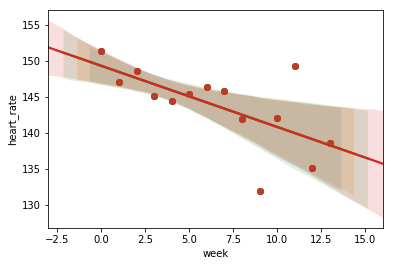

In [45]:
import seaborn as sns
%matplotlib inline

plots = []
for i in range(1,5):
    #print(i)
    group_df = group_result[(group_result["speed_group"] == i) & (group_result["week"] >= 0)]
    plot = sns.regplot(x=speed_2["week"], y=speed_2["heart_rate"])
    plots.append(plot)

KeyError: "['date'] not in index"

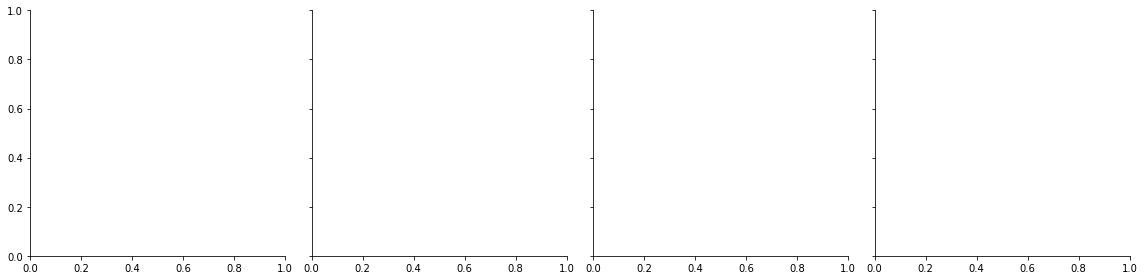

In [75]:
group_result_filtered = group_result[(group_result["week"] >= 0)&(group_result["speed_group"] >=1)&(group_result["speed_group"] <=4)]
g = sns.FacetGrid(group_result_filtered, col="speed_group", margin_titles=True, height=5)
g.map(sns.regplot, "week", "heart_rate");

AttributeError: 'str' object has no attribute 'conjugate'

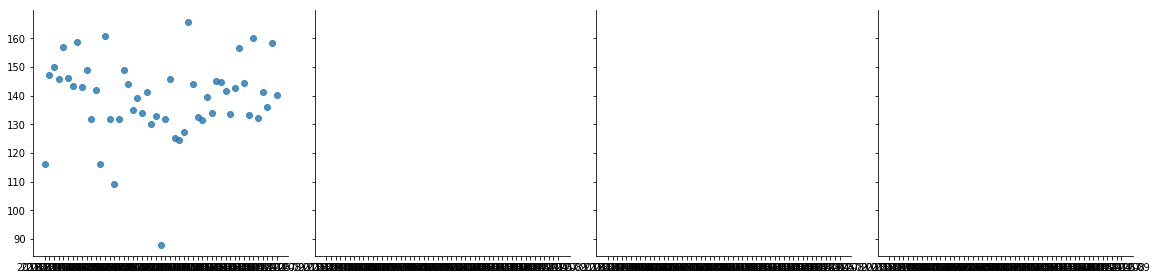

In [85]:
group_result_filtered = date_group_result[(date_group_result["speed_group"] >=1)&(date_group_result["speed_group"] <=4)]
g = sns.FacetGrid(group_result_filtered, col="speed_group", margin_titles=True, height=4)
g.map(sns.regplot, "date", "heart_rate")

/Users/rogerlo/miniconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


ValueError: setting an array element with a sequence.

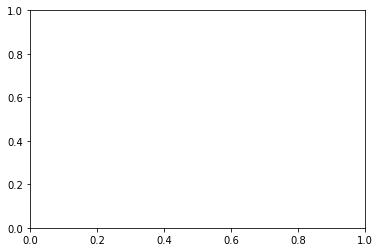

In [97]:
group_df = date_group_result[(date_group_result["speed_group"] == 1)]
plot = sns.tsplot(group_df, "date", "heart_rate")